# This Lab is open from 6 am  9/27-3:30 pm on Friday 

This labk explores frequency table, creating new dataframes and some other data analysis tools in pandas using mostly groupby function in pandas. Read more about groupby, map and datetime in the following links.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

We will be using a csv data set called climbing_statistics. This data set contains Mount Rainer climbing statistics in the year 2015. It has 5 columns. 

Date: Day of the record

Route: The route used to climb the Mt Rainier

Attempted: Number of people who attempted the climb

Succeeded: Number of people who succeeded in reaching the summit

Success Percentage: Percentage of people who succeeded in reaching the summit. 

More details about this data set is here. https://www.kaggle.com/codersree/mount-rainier-weather-and-climbing-data#climbing_statistics.csv. Before starting this homework, please follow this link and read more about this data set. Also make sure to save it in the same folder as your Lab 4 solutions inside DS 201 main folder.

Please import appropriate libraries as usual and load the data.

In [81]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('climbing_statistics.csv')
df['Date'] = pd.to_datetime(df['Date'])# This is to make sure that Date column 
#is in pandas datetime format.

### Problem 1
Make a frequency table of the variable "Attempted" by month. Code hint is given to you below. Explain each piece of the code by googling. You need to explain how each piece in the following code helped calculate the frequency table from the original data. Change the column name "Date" to "Month" and "Attempted" to "Attempted_count. ( 14 points)

In [82]:
df1 = df.groupby(df['Date'].dt.strftime('%B'))['Attempted'].sum().to_frame().reset_index()

In [83]:
df1.rename(columns = {'Date':'Month'}, inplace = True)
df1.rename(columns = {'Attempted':'Attempted_count'}, inplace = True)

(df1)

,Month,Attempted_count
0,April,273
1,August,4310
2,December,3
3,February,84
4,January,106
5,July,6479
6,June,5606
7,March,157
8,May,2128
9,November,7


this dataset works by taking the sum of all attempted climbs in a month and grouping them by month, then outputting them in a table format. STFRTIME converts the given date into a string to be outputted. To_Frame takes the values and puts it in a data frame, and Reset_index works by resetting the index of the data frame.

### Problem 2
Give a new name to the data frame in Problem 1. Make a scatter plot of the data with month in x-axis and attempted count in y axis. Explain what this plot is telling you in a few sentences. ( 12 points)

In [84]:
# Please do the following before plotting.
#1. Create a dictionary of Month and month numbers
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May': 5, 'June': 6, 'July': 7, 
     'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12 }
# 2. Change the Month names to numbers with the following code.
df1.Month = df1.Month.map(d)
# 3. Sort Month column by using
df1.sort_values('Month')
#The reason we are doing this is to make our plot look better. Month name will be crowded.

,Month,Attempted_count
4,1,106
3,2,84
7,3,157
0,4,273
8,5,2128
6,6,5606
5,7,6479
1,8,4310
11,9,1768
10,10,32


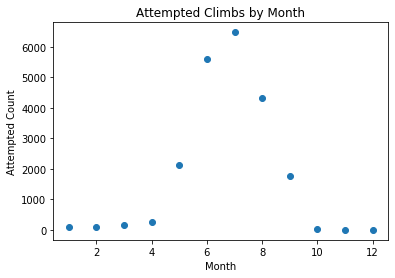

In [85]:
plt.scatter(df1.Month, df1.Attempted_count)
plt.title('Attempted Climbs by Month')
plt.ylabel('Attempted Count');
plt.xlabel('Month');
plt.show()

This plot tells us that there was an increase in attempted climbs during the middle months of the year. This is possibly due to better weather conditions which made peoplee open to the idea of climbing.

#### Problem 3 
Use the code yourdf.groupby(yourdf['Route']).sum().reset_index() to make a new data frame. This data frame adds all the attempted, succeeded and success percentage for each route irrespective of the date. Display the data and you will see that the success percentage column is not quite right. The first entry has 4 attempted, 2 succeeded which is 50\% success rate but the success percentage column says 1\%. Likewise, there are now numbers which are more than 100 in this column. Succeeded number is never more than attempted sothe success percentage is never more than 100\%. Create a new column called Success Rate that has correct values for the success rate. Drop the Success Percentage column and give this data frame a new name. (14 points)

In [109]:
df2 = df.groupby(df['Route']).sum().reset_index()

df2

,Route,Attempted,Succeeded,Success Percentage
0,Curtis RIngraham Directge,4,2,1.000000
1,Disappointment Cleaver,15259,8353,1438.553283
2,Edmonds HW,4,0,0.000000
3,Emmons-Winthrop,3048,1673,338.216739
4,Fuhrer's Finger,197,79,24.166667
5,Fuhrers Finger,76,9,3.000000
6,Gibralter Chute,13,2,1.000000
7,Gibralter Ledges,199,58,20.500000
8,Ingraham Direct,225,16,7.000000
9,Kautz Cleaver,51,16,3.666667


In [110]:
del df2['Success Percentage']

df2

,Route,Attempted,Succeeded
0,Curtis RIngraham Directge,4,2
1,Disappointment Cleaver,15259,8353
2,Edmonds HW,4,0
3,Emmons-Winthrop,3048,1673
4,Fuhrer's Finger,197,79
5,Fuhrers Finger,76,9
6,Gibralter Chute,13,2
7,Gibralter Ledges,199,58
8,Ingraham Direct,225,16
9,Kautz Cleaver,51,16


In [111]:
df2.insert(3,"Success Rate",True)

In [116]:
df2['Success Rate'] = df2['Succeeded']/df2['Attempted']*100

df2

,Route,Attempted,Succeeded,Success Rate
0,Curtis RIngraham Directge,4,2,50.000000
1,Disappointment Cleaver,15259,8353,54.741464
2,Edmonds HW,4,0,0.000000
3,Emmons-Winthrop,3048,1673,54.888451
4,Fuhrer's Finger,197,79,40.101523
5,Fuhrers Finger,76,9,11.842105
6,Gibralter Chute,13,2,15.384615
7,Gibralter Ledges,199,58,29.145729
8,Ingraham Direct,225,16,7.111111
9,Kautz Cleaver,51,16,31.372549


##### Problem 4
Sort the newly created column Success Rate in Problem 3 and list 5 routes with highest success rates and 5 routes with lowest success rates. ( 8 points)

In [121]:
df3 = df2.sort_values(by=['Success Rate'], ascending = False)
df3.head()

,Route,Attempted,Succeeded,Success Rate
21,Tahoma Cleaver,3,3,100.000000
10,Kautz Glacier,949,530,55.848261
3,Emmons-Winthrop,3048,1673,54.888451
1,Disappointment Cleaver,15259,8353,54.741464
17,Ptarmigan RIngraham Directge,57,29,50.877193


In [122]:
df3 = df2.sort_values(by=['Success Rate'])
df3.head()

,Route,Attempted,Succeeded,Success Rate
2,Edmonds HW,4,0,0.0
16,Nisqually Glacier,14,0,0.0
19,Sunset Amphitheater,2,0,0.0
20,Sunset RIngraham Directge,6,0,0.0
11,Kautz Headwall,3,0,0.0
